# Naive Bayes

## Lung Cancer

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import string
import nltk
# if you have never done so, you need to download stopwords from nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
import re
import itertools
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

from nltk.sentiment.util import mark_negation
from nltk import word_tokenize

In [3]:
#load data and add a column for sentiment based on polarity
data = pd.read_csv("cancer_patient.csv", encoding="ISO-8859-1")

#check data to see if everything worked
data

,patient_id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P107,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
3,P189,39,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
4,P19,38,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,Medium
5,P190,49,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
6,P191,37,1,8,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
7,P192,26,2,7,7,7,7,7,6,7,...,2,7,6,7,6,7,2,3,1,High
8,P193,37,2,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
9,P194,33,1,6,7,7,7,7,7,6,...,8,5,7,6,7,8,7,6,2,High


#### here we see that the gender 1 which refer to male is in high level of cancer than female

<span style="color:red"> Interesting and especially for higher levels of lung cancer. Please include a summary sentence like this for all your graphs.</span>

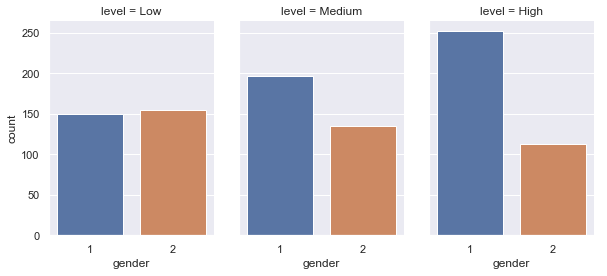

In [39]:
g = sns.catplot(x="gender", col="level",
               data=data, kind="count",height=4, aspect=.7);

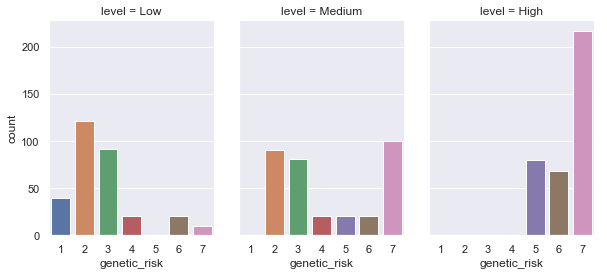

In [40]:
gr = sns.catplot(x="genetic_risk",col="level",
               data=data, kind="count",height=4, aspect=.7);

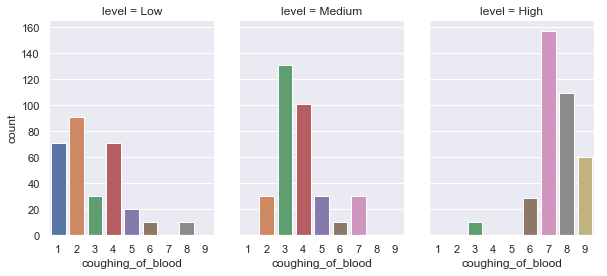

In [43]:
gr = sns.catplot(x="coughing_of_blood",col="level",
               data=data, kind="count",height=4, aspect=.7);

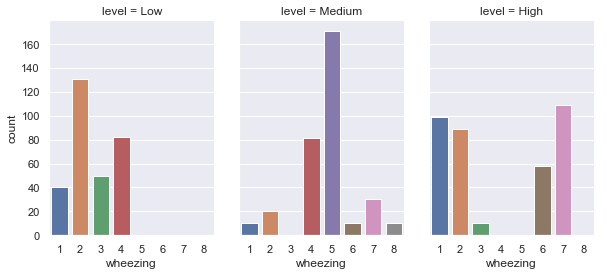

In [44]:
gr = sns.catplot(x="wheezing",col="level",
               data=data, kind="count",height=4, aspect=.7);

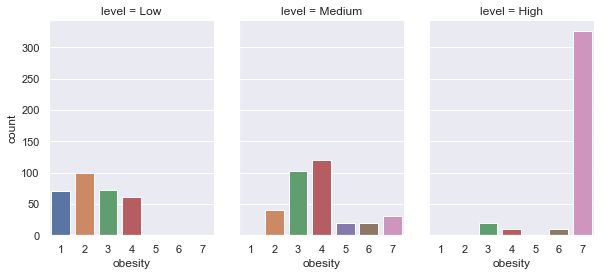

In [45]:
gr = sns.catplot(x="obesity",col="level",
               data=data, kind="count",height=4, aspect=.7);

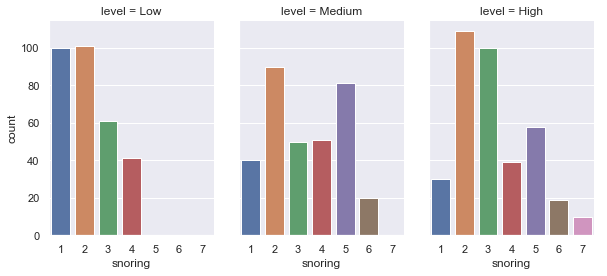

In [46]:
gr = sns.catplot(x="snoring",col="level",
               data=data, kind="count",height=4, aspect=.7);

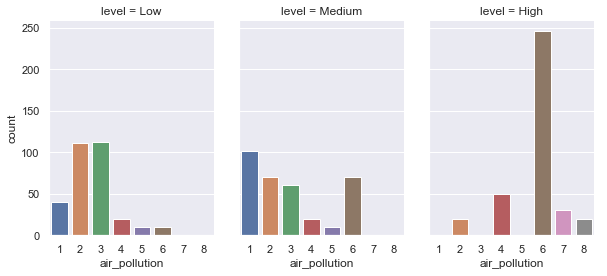

In [47]:
gr = sns.catplot(x="air_pollution",col="level",
               data=data, kind="count",height=4, aspect=.7);

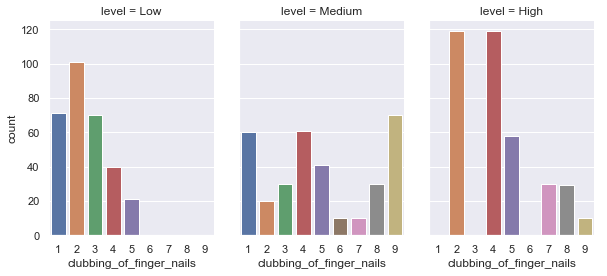

In [48]:
gr = sns.catplot(x="clubbing_of_finger_nails",col="level",
               data=data, kind="count",height=4, aspect=.7);

High      365
Medium    332
Low       303
Name: level, dtype: int64

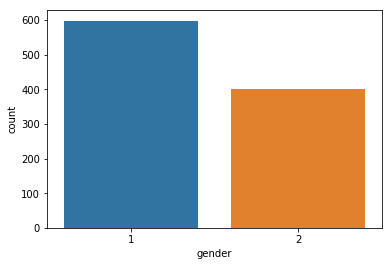

In [10]:
## let's see which gender is more affected by lung_cancer?
sns.countplot(x = 'gender', data = data)
(data['level']).value_counts()

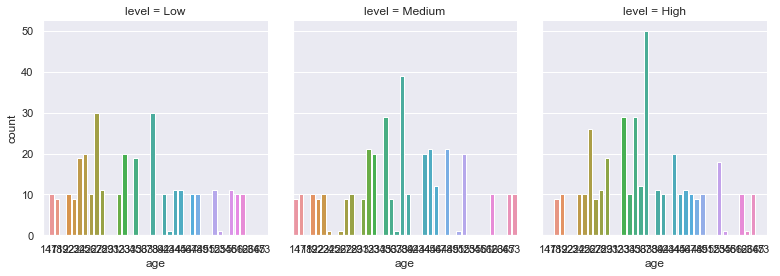

In [57]:
gr = sns.catplot(x="age",col="level",
               data=data, kind="count",height=4, aspect=.9);

High      365
Medium    332
Low       303
Name: level, dtype: int64

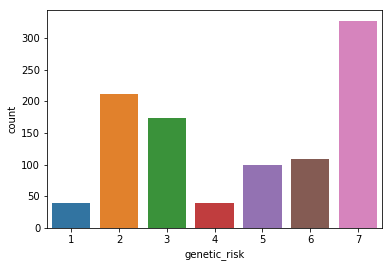

In [23]:
sns.countplot(x = 'genetic_risk', data = data)
(data['level']).value_counts()

### We're observing that too many patients have lung cancer caused by genetic risk

High      365
Medium    332
Low       303
Name: level, dtype: int64

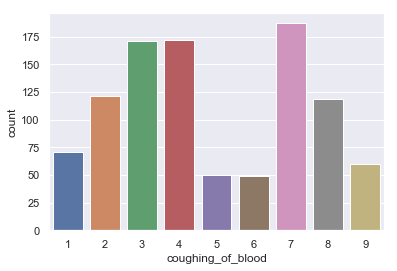

In [49]:
sns.countplot(x = 'coughing_of_blood', data = data)
(data['level']).value_counts()

High      365
Medium    332
Low       303
Name: level, dtype: int64

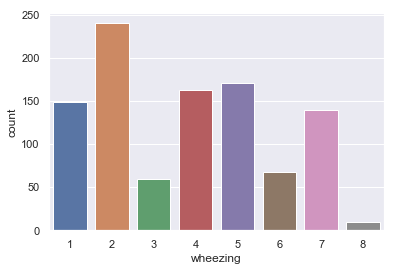

In [50]:
sns.countplot(x = 'wheezing', data = data)
(data['level']).value_counts()

High      365
Medium    332
Low       303
Name: level, dtype: int64

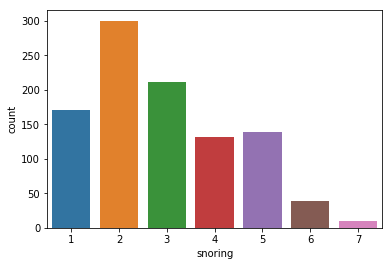

In [11]:
sns.countplot(x = 'snoring', data = data)
data['level'].value_counts()

It looks like most people have positive or neutral comments about microfinance. In fact, the volume of negative comments is the most interesting and should be investigated further.

High      365
Medium    332
Low       303
Name: level, dtype: int64

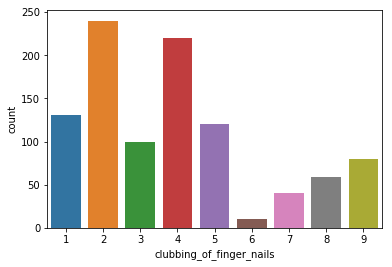

In [24]:
sns.countplot(x = 'clubbing_of_finger_nails', data = data)
data['level'].value_counts()